# Backtest

In [40]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import itertools
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [41]:
df = pd.read_csv('Binance_BTCUSDT_1min.csv')
df = df.iloc[:,:6]
df.columns=['timestamp','open', 'high', 'low', 'close', 'volume']
df.reset_index(drop=True, inplace=True)
df.timestamp = pd.to_datetime(df.timestamp)
df = df.set_index("timestamp")

In [42]:
def resample_df(df, freq):
    resampled_open = df.open.resample(freq).first()
    resampled_high = df.high.resample(freq).max()
    resampled_low = df.low.resample(freq).min()
    resampled_close = df.close.resample(freq).last()
    resampled_volume = df.volume.resample(freq).sum()
    new_df = pd.concat([resampled_open, resampled_high, resampled_low, resampled_close, resampled_volume], axis=1)
    new_df.dropna(inplace=True)
    return new_df

In [43]:
def calc_price(new_df):
    new_df["price"] = new_df.open.shift(-1)

In [54]:
def calc_mtf_ma(new_df, fast_ma_freq, fast_ma_length, slow_ma_freq, slow_ma_length):

    fast_ma_df = new_df['close'].resample(fast_ma_freq).last()
    slow_ma_df = new_df['close'].resample(slow_ma_freq).last()

    new_df['fast_ma'] = fast_ma_df.rolling(fast_ma_length).mean()
    new_df['fast_ma'].ffill(inplace=True)
    
    new_df['slow_ma'] = slow_ma_df.rolling(slow_ma_length).mean()
    new_df['slow_ma'].ffill(inplace=True)

In [57]:
#prepdf
resample_df(df, "4H")
calc_mtf_ma(new_df, "D", 9 , "W", 9)

In [58]:
new_df.tail(50)

,open,high,low,close,volume,slow_ma,fast_ma
timestamp,,,,,,,
2024-02-28 04:00:00,56916.39,58379.57,56894.16,58241.10,7636.88153,45145.081111,53709.306667
2024-02-28 08:00:00,58241.09,59494.06,58171.11,58941.11,19224.20294,45145.081111,53709.306667
2024-02-28 12:00:00,58941.11,61360.00,58891.10,60966.22,26368.91820,45145.081111,53709.306667
2024-02-28 16:00:00,60966.22,64000.00,58700.00,60951.11,45415.56810,45145.081111,53709.306667
2024-02-28 20:00:00,60951.10,62647.04,59797.57,62432.10,16514.36311,45145.081111,53709.306667
2024-02-29 00:00:00,62432.11,62438.22,61021.10,61561.33,10084.02851,45145.081111,54695.102222
2024-02-29 04:00:00,61561.34,63676.35,61334.59,62707.17,14931.15457,45145.081111,54695.102222
2024-02-29 08:00:00,62707.17,63340.95,62111.10,62936.02,11918.80476,45145.081111,54695.102222
2024-02-29 12:00:00,62936.02,63531.88,62051.11,62768.02,12976.74161,45145.081111,54695.102222


In [6]:
def calc_rolling_atr(new_df, anchor_period):
    HL = new_df['high'] - new_df['low']
    HPC = abs(new_df['high'] - new_df['close'].shift(1))
    LPC = abs(new_df['low'] - new_df['close'].shift(1))
    new_df['true_range'] = pd.concat([HL, HPC, LPC], axis=1).max(axis=1)

    groups = new_df.groupby(pd.Grouper(freq=anchor_period))
    
    for index, values in groups:
        
        # Calculate atr using the data available at the current iteration
        rolling_atr = df['atr'] = new_df['true_range'].rolling(window=len(values), min_periods=1).mean()
        
        # Update the corresponding rows in a temporary DataFrame with the calculated rolling atr
        new_df.loc[values.index, 'atr'] = rolling_atr

In [7]:
def calc_rolling_vol(new_df, anchor_period):
      
    groups = new_df.groupby(pd.Grouper(freq=anchor_period))
    
    for index, values in groups:
        
        # Calculate rolling vol within the cuurent group
        group_vol = values['volume'].rolling(window=len(values), min_periods=1).median()
        
        # Update the corresponding rows in the DataFrame with the calculated atr
        new_df.loc[values.index, 'median_vol'] = group_vol

In [10]:
def calc_norm_range(new_df):
    new_df["norm_range"] = new_df.true_range / new_df.atr

In [27]:
def calc_norm_vol(new_df):
    new_df["norm_volume"] = new_df.volume / new_df.median_vol

In [38]:
def calc_ma(new_df):
    new_df['sma_50'] = ta.sma(new_df.close, 50)

In [ ]:
def vsa_indicator(new_df, anchor_period):
    groups = new_df.groupby(pd.Grouper(freq=anchor_period))
    
    for index, values in groups:
        slope, intercept, r_value, _, _ = stats.linregress(new_df['norm_volume'], new_df['norm_range'])
        if slope <= 0.0 or r_value < 0.2:
            values['range_dev'] = 0.0
            continue
        new_df.loc[values.index, 'pred_range'] = intercept + slope * values['norm_volume']
        new_df.loc[values.index, 'range_dev'] = values['norm_range'] - new_df.loc[values.index, 'pred_range']

    return new_df

In [39]:
def calc_buy_signal(new_df):
    new_df['buy_signal'] = np.where((new_df.high_range_dev == True) & (new_df.close > new_df.sma_50), True, False)

In [42]:
calc_buy_signal(new_df)
new_df[new_df.buy_signal == True]

,open,high,low,close,volume,true_range,atr,median_vol,norm_range,norm_volume,pred_range,range_dev,high_range_dev,low_range_dev,sma_50,buy_signal
timestamp,,,,,,,,,,,,,,,,
2017-08-24 22:00:00,4207.00,4330.61,4206.11,4326.23,28.537979,124.50,61.447917,30.111736,2.026106,0.947736,0.867890,1.158216,True,False,4147.4898,True
2017-08-25 15:00:00,4305.00,4422.29,4305.00,4394.36,21.796763,117.29,56.560417,23.795938,2.073712,0.915987,0.852421,1.221290,True,False,4222.8396,True
2017-08-25 19:00:00,4449.44,4449.44,4284.11,4307.17,9.418199,165.33,64.600417,21.343494,2.559271,0.441268,0.621126,1.938145,True,False,4240.0174,True
2017-08-29 13:00:00,4417.07,4625.85,4408.09,4580.00,34.373514,217.77,63.162083,26.719851,3.447796,1.286441,1.032916,2.414880,True,False,4322.1824,True
2017-08-30 12:00:00,4537.00,4592.76,4416.16,4570.00,52.594060,176.60,75.934167,34.419046,2.325699,1.528051,1.150634,1.175064,True,False,4445.6736,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-28 17:00:00,62412.00,64000.00,58700.00,61358.60,23219.736890,5300.00,838.570000,3812.776820,6.320283,6.089981,3.373321,2.946963,True,False,56978.2608,True
2024-02-28 18:00:00,61358.59,61500.02,59200.00,61101.99,10065.132690,2300.02,915.538750,4429.001100,2.512204,2.272551,1.513374,0.998830,True,False,57132.4802,True
2024-03-04 00:00:00,63113.97,64268.24,62300.00,63459.30,6837.794870,1968.24,409.132083,6837.794870,4.810769,1.000000,0.893355,3.917414,True,False,62111.6142,True


In [12]:
new_df = resample_df(df, "1H")
calc_ma(new_df)
calc_rolling_atr(new_df, "D")
calc_rolling_vol(new_df, "D")
calc_norm_range(new_df)
calc_norm_vol(new_df)
vsa_indicator(new_df, "D")
calc_buy_signal(new_df)
new_df

,open,high,low,close,volume,true_range,atr,median_vol,norm_range,norm_volume
timestamp,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,52.30,52.300000,47.181009,1.000000,1.000000
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,37.32,44.810000,35.207963,0.832850,0.659934
2017-08-17 06:00:00,4315.32,4345.45,4309.37,4324.35,7.229691,36.08,41.900000,23.234916,0.861098,0.311156
2017-08-17 07:00:00,4324.35,4349.99,4287.41,4349.99,4.443249,62.58,47.070000,15.232303,1.329509,0.291699
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,44.53,46.562000,7.229691,0.956359,0.134557
...,...,...,...,...,...,...,...,...,...,...
2024-03-07 04:00:00,65847.30,66164.75,65657.59,65843.57,1430.367690,507.16,612.258889,1799.359330,0.828342,0.794932
2024-03-07 05:00:00,65843.58,66123.06,65662.72,65800.00,1692.798540,460.34,585.354444,1746.078935,0.786429,0.969486
2024-03-07 06:00:00,65800.00,66192.40,65675.10,65871.97,1682.084300,517.30,575.250000,1692.798540,0.899261,0.993671


In [21]:
vsa_indicator(new_df, "D")

,open,high,low,close,volume,true_range,atr,median_vol,norm_range,norm_volume,pred_range,range_dev
timestamp,,,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,52.30,52.300000,47.181009,1.000000,1.000000,0.893355,0.106645
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,37.32,44.810000,35.207963,0.832850,0.659934,0.727666,0.105184
2017-08-17 06:00:00,4315.32,4345.45,4309.37,4324.35,7.229691,36.08,41.900000,23.234916,0.861098,0.311156,0.557733,0.303365
2017-08-17 07:00:00,4324.35,4349.99,4287.41,4349.99,4.443249,62.58,47.070000,15.232303,1.329509,0.291699,0.548253,0.781256
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,44.53,46.562000,7.229691,0.956359,0.134557,0.471689,0.484670
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-07 04:00:00,65847.30,66164.75,65657.59,65843.57,1430.367690,507.16,612.258889,1799.359330,0.828342,0.794932,0.793440,0.034902
2024-03-07 05:00:00,65843.58,66123.06,65662.72,65800.00,1692.798540,460.34,585.354444,1746.078935,0.786429,0.969486,0.878487,-0.092058
2024-03-07 06:00:00,65800.00,66192.40,65675.10,65871.97,1682.084300,517.30,575.250000,1692.798540,0.899261,0.993671,0.890271,0.008990


In [48]:
def calc_range_dev(new_df):
    
    new_df['high_range_dev'] = new_df['range_dev'] > 0.8
    new_df['low_range_dev'] = new_df['range_dev'] < -0.8

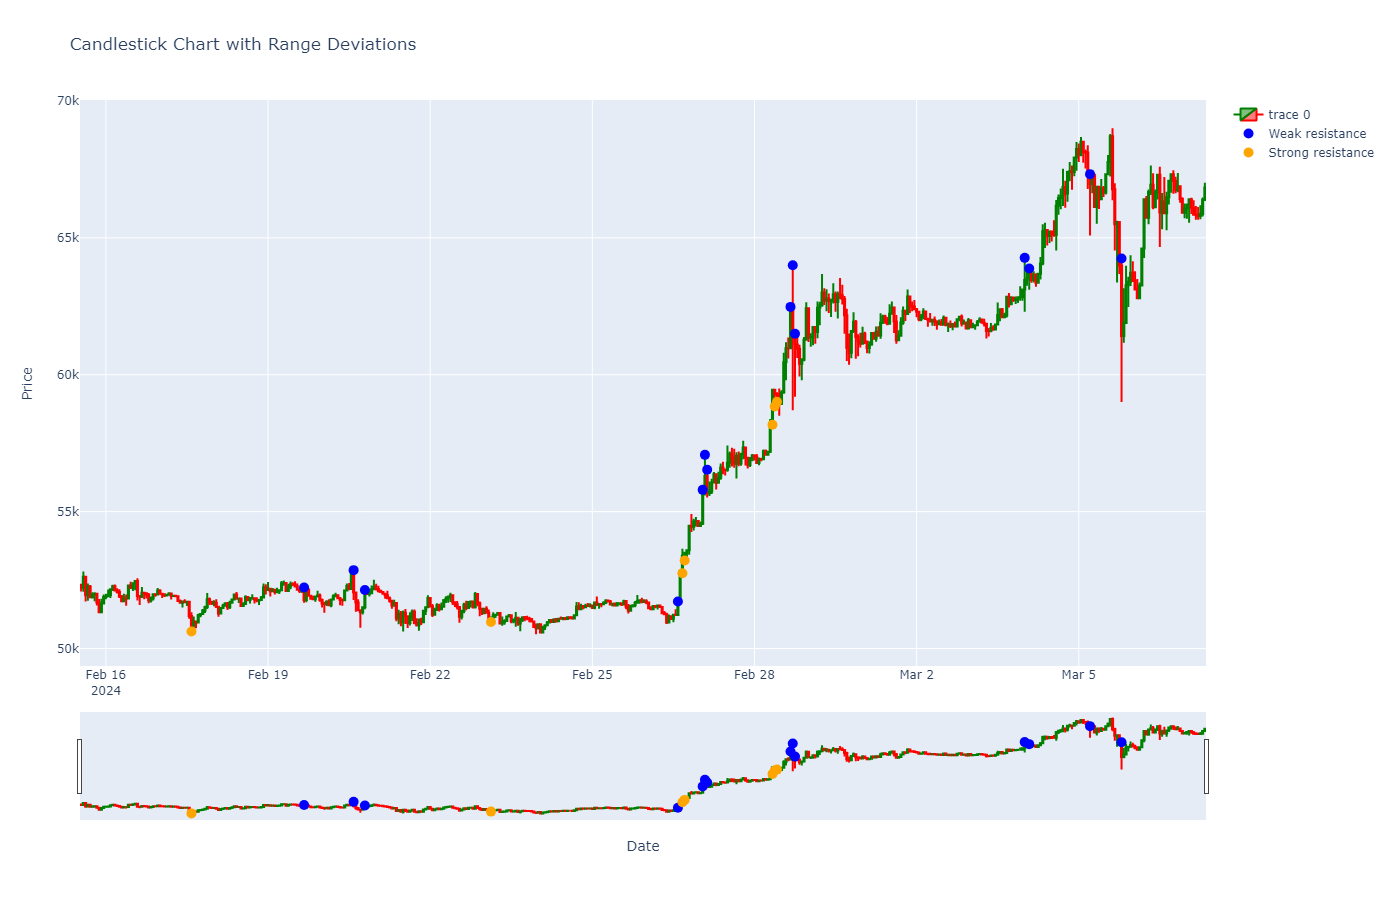

In [26]:
import plotly.graph_objects as go

bars = 500
cutoff_time = new_df.index[-bars]

# Assuming cutoff_time is defined elsewhere in your code
cutoff_time = new_df.index[-bars]

# Filter the DataFrame based on the cutoff date
df_slice = new_df[new_df.index >= cutoff_time]

# Create a candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df_slice.index,
                open=df_slice['open'],
                high=df_slice['high'],
                low=df_slice['low'],
                close=df_slice['close'],
                increasing=dict(line=dict(color='green')),  # Change color for increasing candles
                decreasing=dict(line=dict(color='red')))])  # Change color for decreasing candles

# Add markers for high_range_dev and low_range_dev
high_range_dev = df_slice[df_slice['high_range_dev'] == True]
low_range_dev = df_slice[df_slice['low_range_dev'] == True]

fig.add_trace(go.Scatter(x=high_range_dev.index,
                         y=high_range_dev['high'],
                         mode='markers',
                         name='Weak resistance',
                         marker=dict(color='blue', size=10)))

fig.add_trace(go.Scatter(x=low_range_dev.index,
                         y=low_range_dev['low'],
                         mode='markers',
                         name='Strong resistance',
                         marker=dict(color='orange', size=10)))

# Update layout
fig.update_layout(title='Candlestick Chart with Range Deviations',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  width=1200,
                  height=900)

# Show the figure
fig.show()


<Figure size 1600x1600 with 0 Axes>

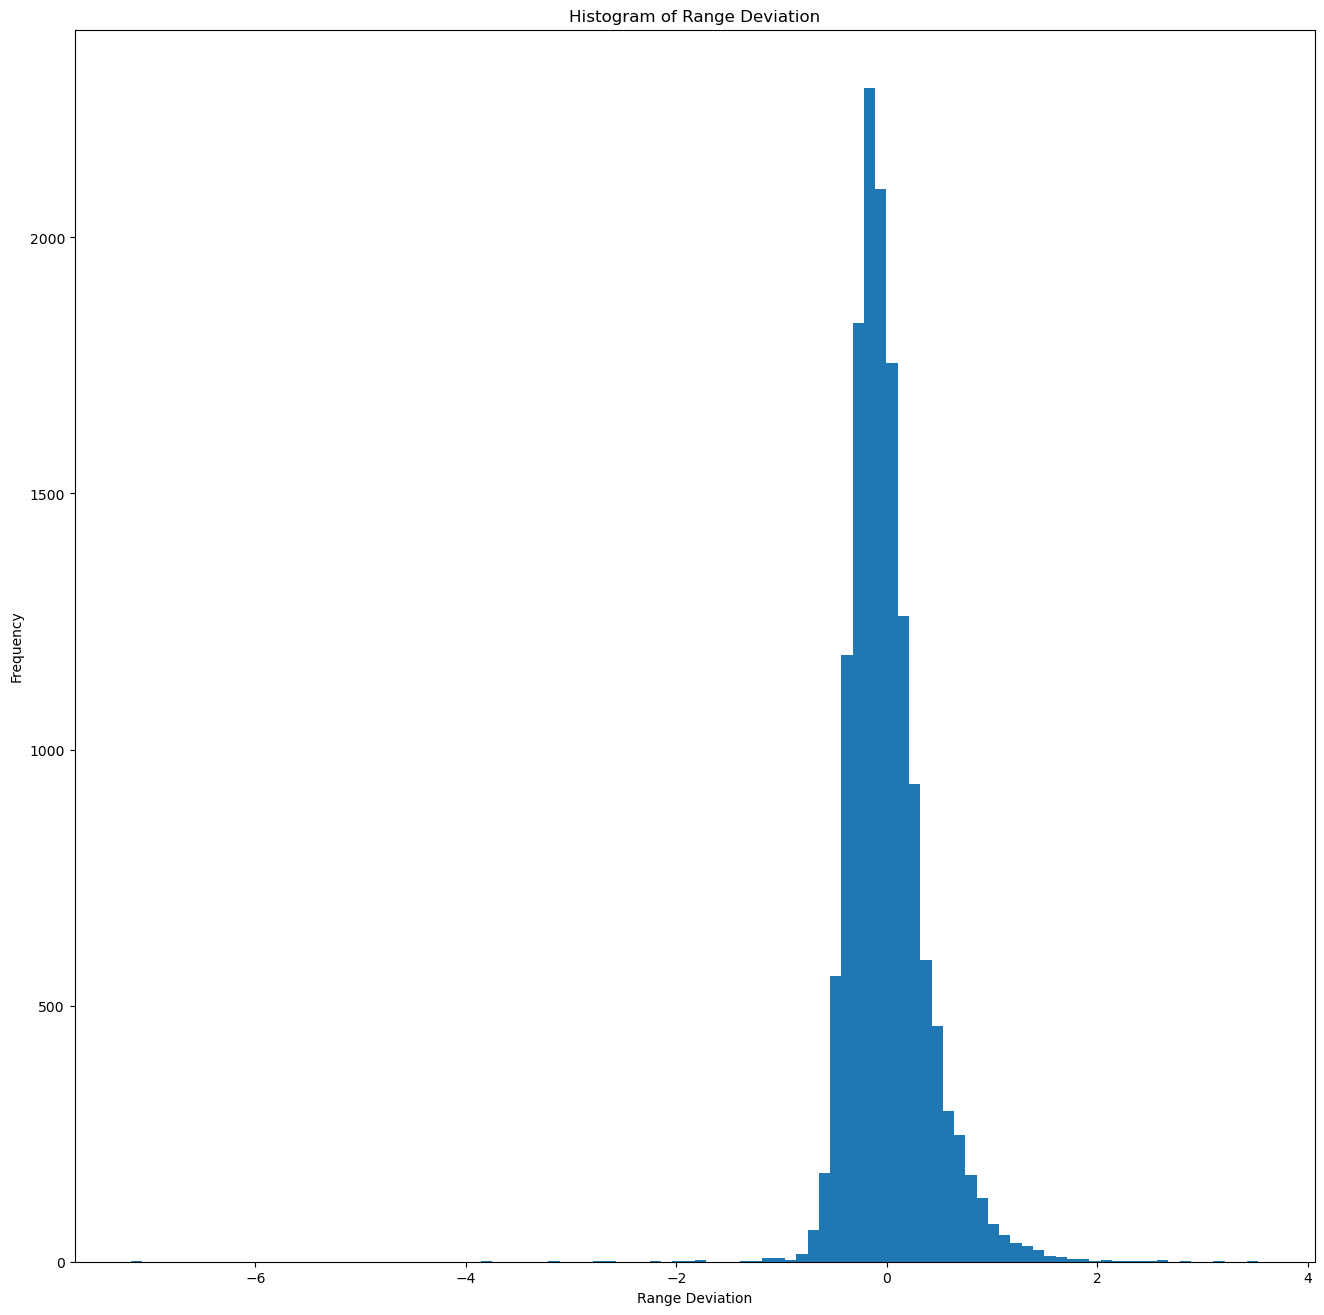

In [52]:
plt.figure(figsize=(16,16))
import matplotlib.pyplot as plt

# Assuming new_df.range_dev contains the data you want to plot
plt.figure(figsize=(16,16))
plt.hist(new_df['range_dev'], bins=100)  # Adjust the number of bins as needed
plt.xlabel('Range Deviation')
plt.ylabel('Frequency')
plt.title('Histogram of Range Deviation')
plt.show()

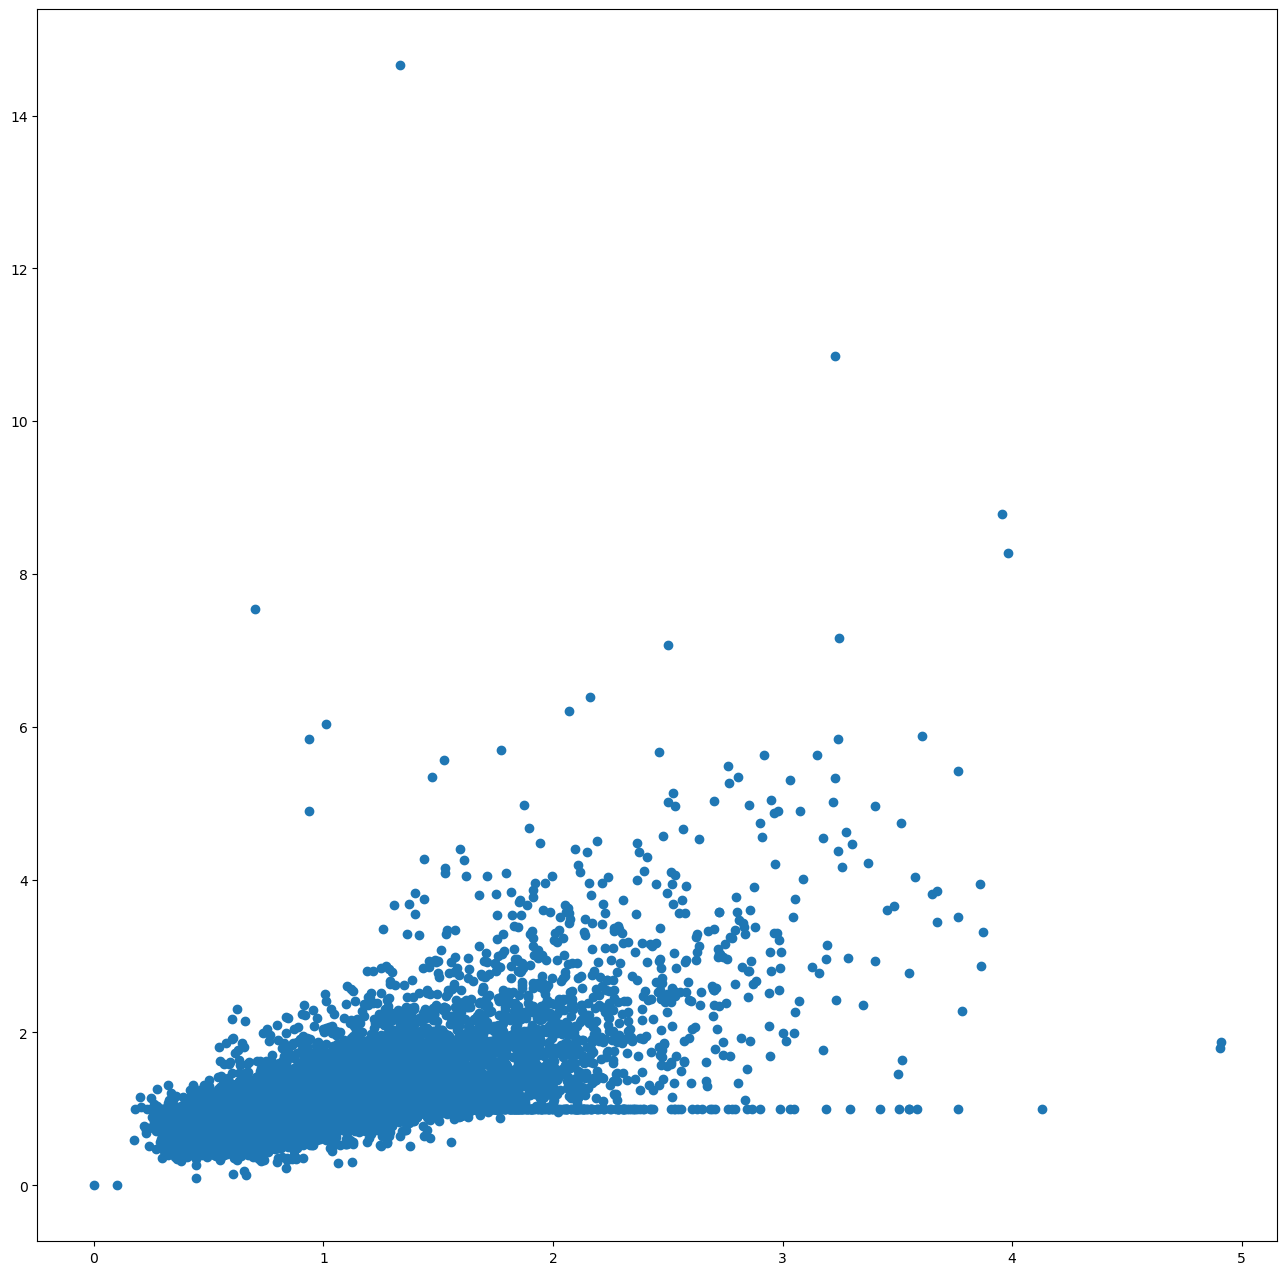

In [30]:
x = new_df.norm_range
y = new_df.norm_volume
plt.figure(figsize=(16,16))
plt.scatter(x, y)
plt.show()

In [7]:
def get_signal(new_df):
    new_df["buy_signal"] = np.where((new_df.is_sfp == True), True, False)

In [ ]:
#Prepare DF
new_df = resample_df(df, "2H")
calc_levels(new_df)
is_SFP(new_df)
get_signal(new_df)
new_df.dropna(inplace=True)
new_df

In [ ]:
len(new_df[new_df.buy_signal == True])/6

In [78]:
def backtest(df, freq, tp, sl):

    new_df = resample_df(df, freq)
    calc_price(new_df)
    calc_ma(new_df)
    calc_rolling_atr(new_df, "D")
    calc_rolling_vol(new_df, "D")
    calc_norm_range(new_df)
    calc_norm_vol(new_df)
    vsa_indicator(new_df, "D")
    calc_range_dev(new_df)
    calc_buy_signal(new_df)
    new_df.dropna(inplace=True)
    
    #Error handle for no buy signals
    if len(new_df[new_df.buy_signal > 0]) < 1:
        empty_result = pd.DataFrame({
            "entry_time": [0],
            "entry_price": [0],
            "tp_target": [0],
            "sl_target": [0],
            "exit_time": [0],
            "exit_price": [0],
            "pnl": [0],
            "equity": [0],
            "pnl_perc": [0]
        })
        amount = 0
        winrate = 0
        pnl = 0
        equity_float = 0
        #return amount, winrate, pnl_perc, equity_float
        return empty_result
    
    #Initialise Varibles
    in_position = False
    trades = []
    current_trade = {}
    initial_equity = 1000
    equity = initial_equity
            
    for i in range(len(new_df)-1):
    #Check exit conditions
        if in_position:
            if new_df.iloc[i].low < current_trade["sl_price"]:
                current_trade["exit_price"] = current_trade["sl_price"]
                pnl = (current_trade["exit_price"] - current_trade["entry_price"])
                pnl_perc = sl - 1
                equity = equity + (equity * pnl_perc)
                #equity_str = "{:.2f}".format(equity)
                trades.append({
                    "entry_time":current_trade["entry_time"],
                    "entry_price":current_trade["entry_price"],
                    "tp_target":current_trade["tp_price"],
                    "sl_target":current_trade["sl_price"],
                    "exit_time":new_df.iloc[i].name,
                    "exit_price":current_trade["sl_price"],
                    "pnl": pnl,
                    "pnl_perc": pnl_perc,
                    "equity": equity
                })
                current_trade = {}
                in_position = False

            elif new_df.iloc[i].high > current_trade["tp_price"]:
                current_trade["exit_price"] = current_trade["tp_price"]
                pnl = (current_trade["exit_price"] - current_trade["entry_price"])
                pnl_perc = tp - 1
                equity = equity + (equity * pnl_perc)
                #equity_str = "{:.2f}".format(equity)
                trades.append({
                    "entry_time":current_trade["entry_time"],
                    "entry_price":current_trade["entry_price"],
                    "tp_target":current_trade["tp_price"],
                    "sl_target":current_trade["sl_price"],
                    "exit_time":new_df.iloc[i].name,
                    "exit_price":current_trade["tp_price"],
                    "pnl":pnl,
                    "pnl_perc": pnl_perc,
                    "equity": equity
                })
                current_trade = {}
                in_position = False

        #Check entry conditions
        if not in_position:
            if new_df.iloc[i].buy_signal == True:
                current_trade["entry_price"] = new_df.iloc[i].price
                current_trade["entry_time"] = new_df.iloc[i+1].name
                current_trade["tp_price"] = new_df.iloc[i].price*tp
                current_trade["sl_price"] = new_df.iloc[i].price*sl
                #current_trade["base_value"] = trade_amount/new_df.iloc[i].price
                #current_trade["quote_value"] = trade_amount
                in_position = True
                
    data = pd.DataFrame(trades)
    amount = len(data)
    winrate = round(len(data.loc[data.pnl.values>0])/len(data)*100,2)
    cum_pnl_perc = round(sum(pd.Series(data.pnl_perc))*100,2)
    equity_value = round(data.equity[len(data) - 1], 2)
    pnl = round(float(data.equity[len(data) - 1]) - initial_equity,2)
    length = data.exit_time[len(data)-1] - data.entry_time[0]
    max_drawdown = 100 - data.equity.min()/initial_equity*100
    equity_high = round(data.equity.max(),2)
    equity_low = round(data.equity.min(),2)
    
    '''print(f"Winrate: {winrate}%")
    print(f"Amount of trades: {amount}")
    print(f"Culmulative pnl: {cum_pnl_perc}%")
    print("")
    print(f"Max drawdown: {max_drawdown} %")
    print(f"Equity Max: {equity_high} USD")
    print(f"Equity Min: {equity_low} USD")
    print(f"Final equity value: {equity_value} USD")
    print("")
    print(f"Summary: ${pnl} profit made from ${initial_equity} initial in about {length} hours & minutes")'''
    return winrate, amount, cum_pnl_perc, max_drawdown, equity_value
    #return data

In [79]:
#def backtest(df, freq, tp, sl):

In [80]:
results = backtest(df, '1H', 1.04, 0.96)

In [76]:
results = backtest(df, '1H', 1.04, 0.96)

In [81]:
results

(57.27, 550, 320.0, 15.607622593096622, 15821.28)

In [64]:
trades = results

In [65]:
trades

,entry_time,entry_price,tp_target,sl_target,exit_time,exit_price,pnl,pnl_perc,equity
0,2017-08-24 23:00:00,4326.24,4499.2896,4153.1904,2017-08-28 04:00:00,4153.1904,-173.0496,-0.04,960.000000
1,2017-08-29 14:00:00,4581.61,4764.8744,4398.3456,2017-09-01 01:00:00,4764.8744,183.2644,0.04,998.400000
2,2017-09-01 23:00:00,4843.17,5036.8968,4649.4432,2017-09-02 05:00:00,4649.4432,-193.7268,-0.04,958.464000
3,2017-09-07 21:00:00,4620.00,4804.8000,4435.2000,2017-09-08 13:00:00,4435.2000,-184.8000,-0.04,920.125440
4,2017-09-12 09:00:00,4290.92,4462.5568,4119.2832,2017-09-12 18:00:00,4119.2832,-171.6368,-0.04,883.320422
...,...,...,...,...,...,...,...,...,...
545,2024-02-27 02:00:00,55768.41,57999.1464,53537.6736,2024-02-28 07:00:00,57999.1464,2230.7364,0.04,15872.030843
546,2024-02-28 17:00:00,62412.00,64908.4800,59915.5200,2024-02-28 17:00:00,59915.5200,-2496.4800,-0.04,15237.149609
547,2024-02-28 18:00:00,61358.59,63812.9336,58904.2464,2024-03-04 00:00:00,63812.9336,2454.3436,0.04,15846.635593
548,2024-03-04 01:00:00,63459.29,65997.6616,60920.9184,2024-03-04 14:00:00,65997.6616,2538.3716,0.04,16480.501017


# Visualise Data

In [66]:
new_df = resample_df(df, "1H")
calc_price(new_df)
calc_ma(new_df)
calc_rolling_atr(new_df, "D")
calc_rolling_vol(new_df, "D")
calc_norm_range(new_df)
calc_norm_vol(new_df)
vsa_indicator(new_df, "D")
calc_range_dev(new_df)
calc_buy_signal(new_df)
new_df.dropna(inplace=True)
new_df

,open,high,low,close,volume,price,sma_50,true_range,atr,median_vol,norm_range,norm_volume,pred_range,range_dev,high_range_dev,low_range_dev,buy_signal
timestamp,,,,,,,,,,,,,,,,,
2017-08-19 05:00:00,4068.26,4123.95,4027.83,4077.00,12.514194,4077.00,4271.1166,96.12,89.460417,19.183197,1.074442,0.652352,0.723972,0.350470,False,False,False
2017-08-19 06:00:00,4077.00,4082.00,3986.87,3986.87,51.455431,3969.12,4264.6774,95.13,90.539583,19.611920,1.050701,2.623681,1.684453,-0.633752,False,False,False
2017-08-19 07:00:00,3969.12,4033.47,3933.21,4033.47,31.429222,4033.47,4259.0404,100.26,93.292500,24.223548,1.074684,1.297466,1.038287,0.036397,False,False,False
2017-08-19 08:00:00,4033.47,4064.84,3964.08,3999.00,18.006405,3999.00,4252.5334,100.76,94.955000,19.611920,1.061134,0.918136,0.853468,0.207666,False,False,False
2017-08-19 09:00:00,3999.00,4082.25,3999.00,4068.20,5.184223,4054.00,4246.8976,83.25,95.843750,19.183197,0.868601,0.270248,0.537801,0.330800,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-07 03:00:00,66101.10,66374.70,65836.86,65847.29,1593.533880,65847.30,65915.7648,537.84,623.197778,1983.914825,0.863033,0.803227,0.797482,0.065551,False,False,False
2024-03-07 04:00:00,65847.30,66164.75,65657.59,65843.57,1430.367690,65843.58,65869.8800,507.16,612.258889,1799.359330,0.828342,0.794932,0.793440,0.034902,False,False,False
2024-03-07 05:00:00,65843.58,66123.06,65662.72,65800.00,1692.798540,65800.00,65823.6012,460.34,585.354444,1746.078935,0.786429,0.969486,0.878487,-0.092058,False,False,False


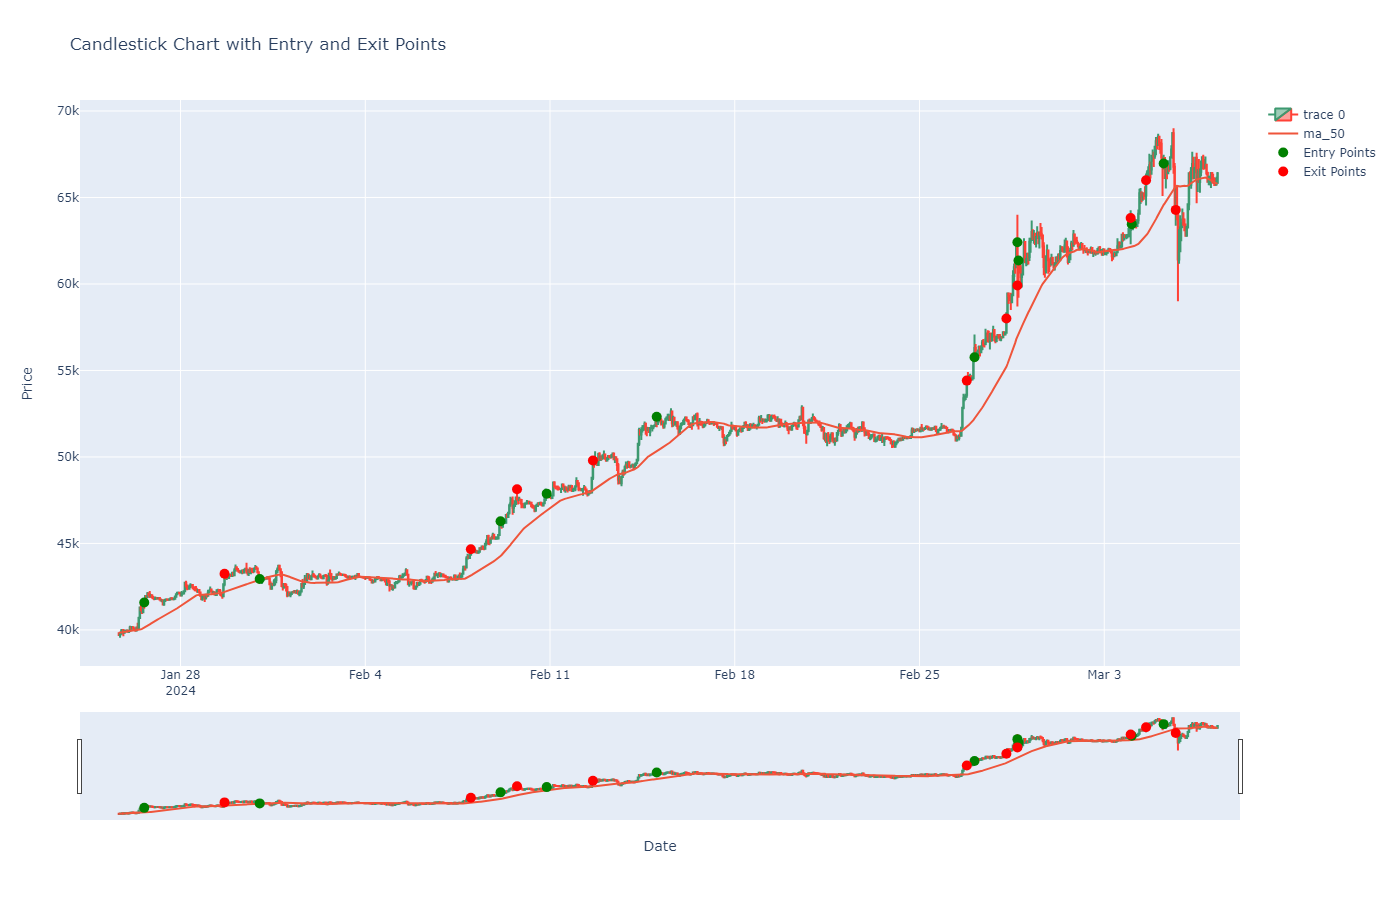

In [67]:
bars = 1000
cutoff_time = new_df.index[-bars]
trades_slice = trades[trades['entry_time'] >= cutoff_time]

# Create a candlestick chart
fig = go.Figure(data=[go.Candlestick(x=new_df.index[-bars:],
                open=new_df['open'].tail(bars),
                high=new_df['high'].tail(bars),
                low=new_df['low'].tail(bars),
                close=new_df['close'].tail(bars))])

# Add scatter plots for entry and exit points
entry_points = dict(x=trades_slice['entry_time'], y=trades_slice['entry_price'], text=['Buy'] * len(trades_slice), mode='markers', name='Entry Points', marker=dict(color='green', size=10))
exit_points = dict(x=trades_slice['exit_time'], y=trades_slice['exit_price'], text=['Sell'] * len(trades_slice), mode='markers', name='Exit Points', marker=dict(color='red', size=10))

# Add entry and exit points to the figure
#fig.add_trace(go.Scatter(x=new_df.index, y=new_df['pdLow'], mode='lines', name='Previous Day Low'))
fig.add_trace(go.Scatter(x=new_df.index[-bars:], y=new_df['sma_50'][-bars:], mode='lines', name='ma_50'))  # Apply cutoff to pdLow data
fig.add_trace(go.Scatter(entry_points))
fig.add_trace(go.Scatter(exit_points))

# Update layout
fig.update_layout(title='Candlestick Chart with Entry and Exit Points', xaxis_title='Date', yaxis_title='Price', width=1200, height=900)

# Show the figure
fig.show()


# Optimise

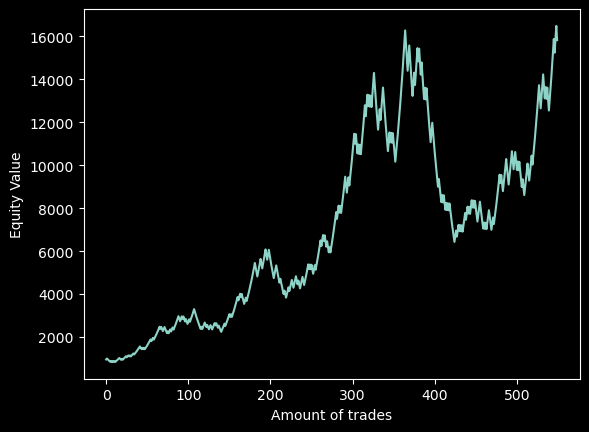

In [71]:

plt.plot(trades.equity)

# Adding labels to the x and y axes
plt.xlabel('Amount of trades')
plt.ylabel('Equity Value')

# Display the plot
plt.show()

In [68]:
# Define the parameter combinations
freq_values = ["5T", "15T", "30T", "1H"]
tp_values = [1.05, 1.06, 1.07, 1.08]
sl_values = [0.95, 0.94, 0.93, 0.92]

In [82]:
# Define the parameter combinations
freq_values = ["1H"]
tp_values = [1.04, 1.06, 1.08]
sl_values = [0.96, 0.94, 0.92]

In [83]:
results_df = pd.DataFrame(columns=["freq", "tp", "sl", "winrate", "amount", "cum_pnl_perc", "max_drawdown", "equity_value"])

In [84]:
for freq, tp, sl in itertools.product(freq_values, tp_values, sl_values):
    winrate, amount, cum_pnl_perc, max_drawdown, equity_value = backtest(df, freq, tp, sl)
    result = pd.DataFrame([[freq, tp, sl, winrate, amount, cum_pnl_perc, max_drawdown, equity_value]], columns=["freq", "tp", "sl", "winrate", "amount", "cum_pnl_perc", "max_drawdown", "equity_value"])
    results_df = pd.concat([results_df, result], ignore_index=True)

In [85]:
results_df

,freq,tp,sl,winrate,amount,cum_pnl_perc,max_drawdown,equity_value
0,1H,1.04,0.96,57.27,550,320.0,15.607623,15821.28
1,1H,1.04,0.94,67.51,477,358.0,21.102785,20871.45
2,1H,1.04,0.92,74.71,427,412.0,16.192156,33321.20
3,1H,1.06,0.96,48.06,439,354.0,13.570494,19832.56
4,1H,1.06,0.94,59.68,372,432.0,12.275047,38643.83
5,1H,1.06,0.92,66.16,328,414.0,14.676452,29636.14
6,1H,1.08,0.96,42.93,375,432.0,22.089925,38660.59
7,1H,1.08,0.94,53.77,305,466.0,20.738366,49263.27
8,1H,1.08,0.92,60.59,269,456.0,16.439925,40698.82


In [86]:
results_df["rr"] = (results_df.tp - 1) / (1 - results_df.sl)


In [87]:
results_df

,freq,tp,sl,winrate,amount,cum_pnl_perc,max_drawdown,equity_value,rr
0,1H,1.04,0.96,57.27,550,320.0,15.607623,15821.28,1.000000
1,1H,1.04,0.94,67.51,477,358.0,21.102785,20871.45,0.666667
2,1H,1.04,0.92,74.71,427,412.0,16.192156,33321.20,0.500000
3,1H,1.06,0.96,48.06,439,354.0,13.570494,19832.56,1.500000
4,1H,1.06,0.94,59.68,372,432.0,12.275047,38643.83,1.000000
5,1H,1.06,0.92,66.16,328,414.0,14.676452,29636.14,0.750000
6,1H,1.08,0.96,42.93,375,432.0,22.089925,38660.59,2.000000
7,1H,1.08,0.94,53.77,305,466.0,20.738366,49263.27,1.333333
8,1H,1.08,0.92,60.59,269,456.0,16.439925,40698.82,1.000000


In [88]:
results_df["equity_value"].max()

1367.84

TypeError: 'DataFrame' object is not callable